In [1]:
from apps.burgers import burgers
from apps.burgers.smoothexample import smooth_example
from pydogpack import main
from pydogpack.tests.utils import utils
from pydogpack.utils import dg_utils
from pydogpack.utils import math_utils
from pydogpack.utils import x_functions
from pydogpack.visualize import plot

from IPython.display import HTML
import numpy as np

# Smooth Burgers Example

0.030661429167631933


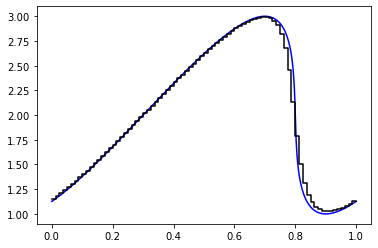

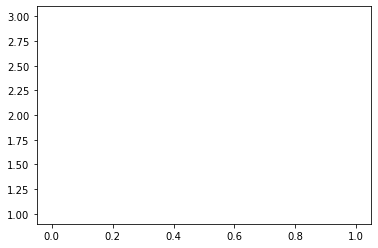

In [17]:
initial_condition = x_functions.Sine(offset=2.0)
max_wavespeed = 3.0
problem = smooth_example.SmoothExample(initial_condition, max_wavespeed)
time_final = 0.15
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 1
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = False
problem.parameters["time_stepping"]["order"] = space_time_order

num_elems = 80
x_left = 0.0
x_right = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["num_elems"] = num_elems

problem.parameters["basis"]["basis_class"] = "legendre"
problem.parameters["basis"]["inner_product_constant"] = 0.5
problem.parameters["basis"]["num_basis_cpts"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl = dg_utils.standard_cfls(space_time_order)
# cfl = 0.2
problem.parameters["delta_t"] = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, (x_right - x_left) / num_elems))

final_solution = main.run(problem)
exact_final_solution = x_functions.FrozenT(problem.exact_solution, time_final)
error = math_utils.compute_error(final_solution, exact_final_solution)
print(error)

p = plot.create_plot_dg(final_solution, exact_final_solution)
ani, fig = plot.create_animation_output_dir(problem.output_dir, problem.exact_solution)
HTML(ani.to_html5_video())

# Convergence Test

## DG Convergence

In [23]:
initial_condition = x_functions.Sine(offset=2.0)
max_wavespeed = 3.0
problem = smooth_example.SmoothExample(initial_condition, max_wavespeed)
# too close to the shock time and convergence degrades
time_final = 0.14
exact_final_solution = x_functions.FrozenT(problem.exact_solution, time_final)

problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

problem.parameters["basis"]["basis_class"] = "legendre"
problem.parameters["basis"]["inner_product_constant"] = 0.5

problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = False

x_left = 0.0
x_right = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

In [26]:
for num_basis_cpts in range(1, 5):
    problem.parameters["basis"]["num_basis_cpts"] = num_basis_cpts
    problem.parameters["time_stepping"]["order"] = num_basis_cpts
    
    cfl = dg_utils.standard_cfls(num_basis_cpts)
    error_list = []
    for num_elems in [80, 160]:
        problem.parameters["delta_t"] = dg_utils.get_delta_t(cfl, problem.max_wavespeed, (x_right - x_left) / num_elems)
        problem.parameters["mesh"]["num_elems"] = num_elems
        final_solution = main.run(problem)
        error = math_utils.compute_error(final_solution, exact_final_solution)
        error_list.append(error)
    order = utils.convergence_order(error_list)
    print(order)
    print(error_list)
    if error_list[-1] >= math_utils.MACHINE_ERROR:
        assert order >= num_basis_cpts

1.0
[0.025293743467211048, 0.013631294975372577]
2.0
[0.001906383912158744, 0.0005025121413230757]
3.0
[0.000328772863027484, 4.476592844132876e-05]
4.0
[6.409682789276424e-05, 5.080755592318797e-06]


In [22]:
error_list[0]/error_list[1]

2.7160085193287955

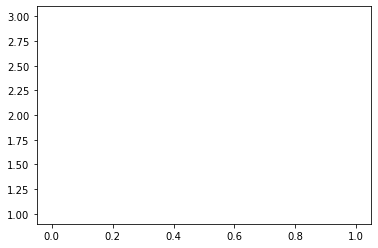

In [27]:
ani, fig = plot.create_animation_output_dir(problem.output_dir)
HTML(ani.to_html5_video())

## FV Convergence

In [3]:
initial_condition = x_functions.Sine(offset=2.0)
max_wavespeed = 3.0
problem = smooth_example.SmoothExample(initial_condition, max_wavespeed)
time_final = 0.14
exact_final_solution = x_functions.FrozenT(problem.exact_solution, time_final)

problem.parameters["time_final"] = time_final
problem.parameters["use_wave_propogation_method"] = True

problem.parameters["basis"]["basis_class"] = "finite_volume"

problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["order"] = 1
problem.parameters["time_stepping"]["is_verbose"] = False

x_left = 0.0
x_right = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem.parameters["mesh"]["x_left"] = 0.0
problem.parameters["mesh"]["x_right"] = 1.0

problem.parameters["fluctuation_solver"]["fluctuation_solver_class"] = "roe"

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"

In [4]:
cfl = dg_utils.standard_cfls(1)
error_list = []
for num_elems in [80, 160]:
    problem.parameters["delta_t"] = dg_utils.get_delta_t(cfl, problem.max_wavespeed, (x_right - x_left) / num_elems)
    problem.parameters["mesh"]["num_elems"] = num_elems
    final_solution = main.run(problem)
    error = math_utils.compute_error(final_solution, exact_final_solution)
    error_list.append(error)
order = utils.convergence_order(error_list)
if error_list[-1] >= math_utils.MACHINE_ERROR:
    assert order >= 1
else:
    print(error_list)

[1.0863599218806744e-15, 2.7797933034081654e-15]


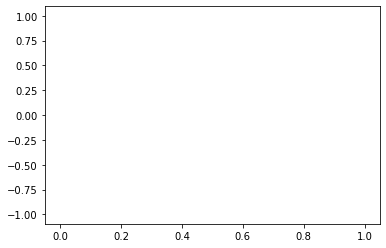

In [5]:
ani, fig = plot.create_animation_output_dir(problem.output_dir)
HTML(ani.to_html5_video())

In [22]:
1/(2 * np.pi)

0.15915494309189535